# Exploring Dandiset 001359: Multimodal Patch-seq Recordings from the Human Brain

*Notebook generated with the assistance of AI — review and validate code/results before relying on them.*

---

This interactive notebook will guide you through exploring **Dandiset 001359: "20250331_AIBS_Patchseq_human"**, a rich collection of multimodal Patch-seq recordings from human brain tissue provided by the Allen Institute for Brain Science in collaboration with NIMH.

Dandiset DOI: [https://doi.org/10.48324/dandi.001359/0.250401.1603](https://doi.org/10.48324/dandi.001359/0.250401.1603)  
Dandiset URL: [https://dandiarchive.org/dandiset/001359/0.250401.1603](https://dandiarchive.org/dandiset/001359/0.250401.1603)

## About this notebook

This notebook will help you:
- **Summarize** the contents and scientific context of the Dandiset
- **Access** and **list** the data assets (files) using the DANDI API
- **Stream and load NWB files** to inspect electrophysiology data, stimuli, spike detections, and subject/session metadata
- **Visualize** representative sweeps of intracellular voltage and current data
- **Guide** you through the NWB file structure so you can design your own analyses

---

## Prerequisites

This notebook requires the following Python packages (assumed pre-installed):
- `dandi` (for DandiAPIClient)
- `remfile` (for remote file streaming)
- `h5py`
- `pynwb`
- `matplotlib`
- `numpy`

**Note:** The code does not perform any pip installations.

## Dandiset Overview

- **Title:** 20250331_AIBS_Patchseq_human
- **Version:** 0.250401.1603
- **Total Files:** 391 NWB files
- **Subjects:** 33 human donors
- **Total Data:** ~23.8 GB
- **Keywords:** Patch-seq, human, multimodal
- **Approaches:** Current & Voltage Clamp Electrophysiology
- **Primary Data Standard:** NWB (Neurodata Without Borders)

This Dandiset contains multimodal Patch-seq data—simultaneous electrophysiology, morphology, and transcriptomics—from single human neurons. The electrophysiological data was acquired and processed using industry-standard instrumentation and is organized using the NWB file format, making it programmatically accessible and suitable for reanalysis.

**Typical Measurements Include:**
- Voltage clamp/current clamp time series
- Stimulus time series and metadata
- Detected spike times (where available)
- Rich session and subject metadata

For full details, refer to the [Dandiset page](https://dandiarchive.org/dandiset/001359/0.250401.1603).

## Notebook Roadmap

1. **Browse Dandiset Assets:** List the contained NWB files
2. **Select and Load a File:** Stream a file of interest and load it into memory without explicit download
3. **Explore NWB Structure:** Discover subject, session, device, electrode, acquisition, stimulus, and spike detection data
4. **Visualize Example Data:** Plot representative sweeps of current clamp, voltage clamp, and related data
5. **Next Steps:** Suggestions for deeper analysis

Let's get started!

In [1]:
# Import core packages for accessing remote DANDI data and NWB files

from dandi.dandiapi import DandiAPIClient             # To access DANDI assets
import remfile                                        # Streaming files without local download
import h5py                                           # For HDF5 low-level access
import pynwb                                          # For reading NWB files
import matplotlib.pyplot as plt                       # For plotting
import numpy as np

## 1. Browsing Assets in Dandiset 001359

Below, we connect to the DANDI Archive and list a small sample of NWB files available in this Dandiset. Each file corresponds to an intracellular electrophysiology session from a unique subject or session.

In [2]:
# Connect to the DANDI Archive and retrieve Dandiset 001359

dandiset_id = "001359"
dandiset_version = "0.250401.1603"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List NWB assets in the dandiset
assets = list(dandiset.get_assets())
print(f"Total NWB files in dandiset: {len(assets)}\n")

# Display a few example file paths
for i, asset in enumerate(assets[:5]):
    print(f"{i+1}. {asset.path}")

Total NWB files in dandiset: 391

1. sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
2. sub-1203384279/sub-1203384279_ses-1207304122_icephys.nwb
3. sub-1203384279/sub-1203384279_ses-1207262032_icephys.nwb
4. sub-1203384279/sub-1203384279_ses-1207418023_icephys.nwb
5. sub-1203384279/sub-1203384279_ses-1208065964_icephys.nwb


_**Tip:** Each NWB file follows the convention `sub-<subject_id>/sub-<subject_id>_ses-<session_id>_icephys.nwb`_

Let's choose one file as an example to explore in detail.

## 2. Streaming & Loading an NWB File

We'll select the file

```
sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
```

and stream it directly from the DANDI server (no local download needed) into an `NWBFile` object using `pynwb`.

In [3]:
# Specify the file of interest
file_path = "sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb"

# Get the download URL for streaming
asset = next(dandiset.get_assets_by_glob(file_path))
url = asset.download_url

# Stream the file remotely and open as HDF5/NWB
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()
print("Loaded NWB file:", file_path)
print("NWB session_id:", nwb.session_id)

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.4 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Loaded NWB file: sub-1203384279/sub-1203384279_ses-1207984257_icephys.nwb
NWB session_id: 1207984257


## 3. Exploring NWB Structure: Metadata, Subject, and Devices

Let's summarize high-level information about this session and its subject.

In [4]:
# Basic session metadata
print("Session Description:", nwb.session_description)
print("Session Start Time:", nwb.session_start_time)
print("Institution:", nwb.institution)
print("Data Collection:", nwb.data_collection)
print("Source Script/Filename:", nwb.source_script_file_name)

# Subject metadata
subject = nwb.subject
print("\nSubject Information:")
print(f"  Subject ID: {subject.subject_id}")
print(f"  Species: {subject.species}")
print(f"  Sex: {subject.sex}")
print(f"  Age: {subject.age}")

# List devices
print("\nDevices in file:")
for k in nwb.devices:
    print(f"  {k}: {nwb.devices[k].description}")

Session Description: PLACEHOLDER
Session Start Time: 2022-09-07 17:13:04.880000+00:00
Institution: Allen Institute for Brain Science
Data Collection:   Specified StimSet file at C:/ProgramData/AllenInstitute/MIES/MIESHDF5Files/SavedStimSets/PS_Stimsets_2022_08_11.nwb loaded successfully.
  It appears that a holding potential is being applied, therefore as a precaution, the gains cannot be imported for the V_CLAMP_MODE.
  The gains were successfully imported for the I_CLAMP_MODE on i: 0
  There was a mismatch in clamp mode between MIES and the MCC. The MCC mode was switched to match the mode specified by MIES.
  Device used for pressure regulation: Pressure1and2 (NI)
  path: "C:/ProgramData/AllenInstitute/MIES/MIESData:"
  Please be patient while we export all existing acquired content of all devices to NWB
  The stimset "pink1" can not be exported as it can not be recreated.
  The stimset "pink1sub" can not be exported as it can not be recreated.
  The stimset "pink1supra" can not be e

## 4. Intracellular Electrode and Sweep Table

NWB organizes data by recording channel (`electrode_0` here) and "sweeps" (epochs/acquisitions of data under specific stimulus/protocol).

Let's summarize the electrode and review the sweep table.

In [5]:
# Examine the intracellular electrode
electrode = nwb.icephys_electrodes['electrode_0']
print(f"Electrode description: {electrode.description}")
print(f"Electrode device: {electrode.device.description}")

# Display the first few rows of the sweep table
# (Each row describes a sweep/recording, and which PatchClampSeries are included)
sweep_table = nwb.sweep_table.to_dataframe()
print("\nFirst few entries in sweep table:")
display(sweep_table.head())

Electrode description: Headstage 0
Electrode device: Harvard Bioscience (formerly HEKA/Instrutech) Model: ITC18USB

First few entries in sweep table:


series  sweep_number
id                                                                 
0   [data_00000_AD0 pynwb.icephys.VoltageClampSeri...             0
1   [data_00000_DA0 pynwb.icephys.VoltageClampStim...             0
2   [data_00001_AD0 pynwb.icephys.VoltageClampSeri...             1
3   [data_00001_DA0 pynwb.icephys.VoltageClampStim...             1
4   [data_00002_AD0 pynwb.icephys.VoltageClampSeri...             2

## 5. Acquisition & Stimulus Series: What was Recorded?

NWB acquisition groups PatchClamp time series for each sweep.

Let's:
- List available acquisition and stimulus time series
- Show comments, units, and sweep numbers for the first 6 voltage or current clamp series

In [6]:
# List all acquisition and stimulus series available
print("Available acquisition series:")
for k in list(nwb.acquisition.keys())[:10]:
    print(f"  {k} ({type(nwb.acquisition[k]).__name__})")

print("\nAvailable stimulus series:")
for k in list(nwb.stimulus.keys())[:10]:
    print(f"  {k} ({type(nwb.stimulus[k]).__name__})")

# Display info for the first 6 acquisition series
for i in range(6):
    series_key = f"data_{i:05d}_AD0"
    acq = nwb.acquisition[series_key]
    print(f"\nSeries: {series_key}")
    print(f"  Type: {type(acq).__name__}")
    print(f"  Sweep #: {getattr(acq, 'sweep_number', 'N/A')}")
    print(f"  Unit: {acq.unit}")
    print(f"  Data shape: {acq.data.shape}")
    print(f"  Stimulus: {acq.stimulus_description}")
    print(f"  Comments: {acq.comments[:60]}...")

Available acquisition series:
  data_00000_AD0 (VoltageClampSeries)
  data_00001_AD0 (VoltageClampSeries)
  data_00002_AD0 (VoltageClampSeries)
  data_00003_AD0 (VoltageClampSeries)
  data_00004_AD0 (VoltageClampSeries)
  data_00005_AD0 (VoltageClampSeries)
  data_00006_AD0 (CurrentClampSeries)
  data_00007_AD0 (CurrentClampSeries)
  data_00008_AD0 (CurrentClampSeries)
  data_00009_AD0 (CurrentClampSeries)

Available stimulus series:
  data_00000_DA0 (VoltageClampStimulusSeries)
  data_00001_DA0 (VoltageClampStimulusSeries)
  data_00002_DA0 (VoltageClampStimulusSeries)
  data_00003_DA0 (VoltageClampStimulusSeries)
  data_00004_DA0 (VoltageClampStimulusSeries)
  data_00005_DA0 (VoltageClampStimulusSeries)
  data_00006_DA0 (CurrentClampStimulusSeries)
  data_00007_DA0 (CurrentClampStimulusSeries)
  data_00008_DA0 (CurrentClampStimulusSeries)
  data_00009_DA0 (CurrentClampStimulusSeries)

Series: data_00000_AD0
  Type: VoltageClampSeries
  Sweep #: 0
  Unit: amperes
  Data shape: (161000,

## 6. Visualizing Voltage Clamp and Current Clamp Data

Let's plot:
- A representative **voltage clamp** sweep (current as a function of time)
- The corresponding **stimulus command waveform** (applied voltage)
- An example **current clamp** sweep (membrane voltage)

We'll align time axes using metadata from the NWB structure.

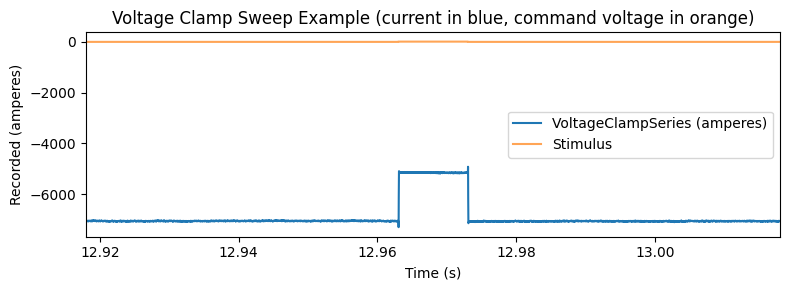

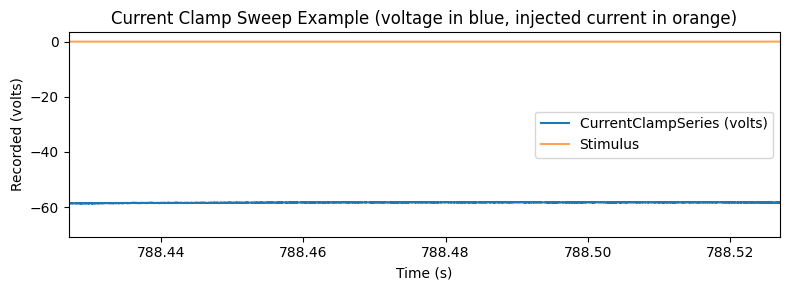

In [7]:
# Helper function to plot a single sweep and its stimulus (if available)
def plot_sweep(acq, stim, title, tmax=None):
    # x axis in seconds
    n_samples = acq.data.shape[0]
    rate = acq.rate
    t = np.arange(n_samples) / rate + acq.starting_time

    plt.figure(figsize=(8, 3))
    plt.plot(t, acq.data[:], color='C0', label=f"{type(acq).__name__} ({acq.unit})")
    if stim is not None:
        plt.plot(t, stim.data[:], color='C1', alpha=0.7, label='Stimulus')
    plt.xlabel("Time (s)")
    plt.ylabel(f"Recorded ({acq.unit})")
    plt.title(title)
    plt.legend()
    if tmax is not None:
        plt.xlim([t[0], t[0]+tmax])
    plt.tight_layout()
    plt.show()

# Plot a voltage clamp sweep and its stimulus
series_idx = 0
acq = nwb.acquisition[f"data_{series_idx:05d}_AD0"]
stim = nwb.stimulus[f"data_{series_idx:05d}_DA0"]

plot_sweep(acq, stim, title="Voltage Clamp Sweep Example (current in blue, command voltage in orange)", tmax=0.1)

# Plot a current clamp sweep and its stimulus
# Find the first CurrentClampSeries in acquisition
cc_idx = None
for i, k in enumerate(nwb.acquisition.keys()):
    if isinstance(nwb.acquisition[k], pynwb.icephys.CurrentClampSeries):
        cc_idx = i
        break

if cc_idx is not None:
    cc_key = list(nwb.acquisition.keys())[cc_idx]
    acq_cc = nwb.acquisition[cc_key]
    stim_cc = nwb.stimulus[cc_key.replace("_AD0", "_DA0")]
    plot_sweep(acq_cc, stim_cc, title="Current Clamp Sweep Example (voltage in blue, injected current in orange)", tmax=0.1)
else:
    print("No CurrentClampSeries found in this file.")

## 7. Exploring Detected Spikes (Processing Module)

Some files contain spike detection results precomputed in the NWB processing module (`spikes`). Each sweep can have detected spike times (in seconds).

Let's list sweeps for which spike times are present and plot them for an example sweep.

Sweeps with detected spikes: ['Sweep_19', 'Sweep_24', 'Sweep_25', 'Sweep_26', 'Sweep_27', 'Sweep_28', 'Sweep_29', 'Sweep_30', 'Sweep_31', 'Sweep_33', 'Sweep_45', 'Sweep_47', 'Sweep_48', 'Sweep_50']


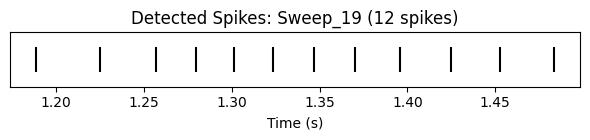

In [8]:
# Access the spike detection processing module
spikes_mod = nwb.processing.get("spikes", None)
if spikes_mod is not None:
    sweep_names = list(spikes_mod.data_interfaces.keys())
    # List sweeps with non-empty data
    spike_sweeps = [name for name in sweep_names if len(spikes_mod.data_interfaces[name].data[:]) > 0]
    print("Sweeps with detected spikes:", spike_sweeps)
    
    # Plot spike times for one sweep (if available)
    if spike_sweeps:
        name = spike_sweeps[0]
        spikes_ts = spikes_mod.data_interfaces[name]
        spk_times = spikes_ts.data[:]
        plt.figure(figsize=(6, 1.5))
        plt.eventplot([spk_times], orientation='horizontal', colors='k')
        plt.xlabel('Time (s)')
        plt.title(f"Detected Spikes: {name} ({len(spk_times)} spikes)")
        plt.yticks([])
        plt.tight_layout()
        plt.show()
    else:
        print("No sweeps with spike times found in this file.")
else:
    print("No 'spikes' processing module present in this file.")

## 8. Working with Epochs and Experimental Intervals

NWB files describe experimental epochs (intervals/tags for different protocol phases). These intervals provide context for time-series data and can be crucial for aligning your analysis.

Let's display the first few epochs.

In [9]:
# Show a summary of experimental epochs in this NWB file
epochs_df = nwb.epochs.to_dataframe()
print("First few epochs:")
display(epochs_df.head())

First few epochs:


start_time  stop_time                                               tags  \
id                                                                             
1       12.918     12.963  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
2       12.918     13.018            [Type=Inserted Testpulse, ShortName=TP]   
3       12.963     12.973  [Type=Inserted Testpulse, SubType=Pulse, Ampli...   
4       12.973     13.018  [Type=Inserted Testpulse, SubType=Baseline, Sh...   
5       13.018     13.518   [Name=Baseline Chunk, Index=0, ShortName=U_BLC0]   

                                           timeseries  treelevel  
id                                                                
1   [(0, 9000, data_00000_DA0 pynwb.icephys.Voltag...        1.0  
2   [(0, 20000, data_00000_DA0 pynwb.icephys.Volta...        0.0  
3   [(9000, 2000, data_00000_DA0 pynwb.icephys.Vol...        1.0  
4   [(11000, 9000, data_00000_DA0 pynwb.icephys.Vo...        1.0  
5   [(20000, 100000, data_00000_DA0 pynwb.icephys....       -1.0

## 9. Next Steps and Further Analysis

This notebook provided an overview and introductory exploration of Dandiset 001359, including:
- Accessing assets programmatically from the DANDI Archive
- Loading and inspecting NWB files in streamed mode
- Exploring subject, session, device, electrode, and sweep information
- Visualizing electrophysiology data and detected spikes

**Next Steps for Deeper Analysis:**
- Iterate over all files (batch analysis of sweeps/metadata)
- Quantify basic properties (e.g., input resistance, AP thresholds)
- Correlate electrophysiology with donor/subject demographics
- Extract and analyze epochs for protocol-specific responses
- Link to morphology/transcriptomic data (if available)

For more information, see the associated Dandiset protocol:  
[Patch-seq recording and extraction protocol](https://www.protocols.io/view/patch-seq-recording-and-extraction-8epv51n45l1b/v3)

---

*Happy analyzing!*